
# OpenCV shape detection



We'll use the detect shapes.py driver script to load an image from disc, analyse it for shapes, and then utilise the ShapeDetector class to conduct shape detection and identification.

Ensure that you have the imutils package installed on your machine, which contains a set of OpenCV convenience functions that we'll use later in this project.

In [ ]:
from google.colab.patches import cv2_imshow
import imutils
import cv2
import os
import glob
import argparse



# Defining the parameters of our form detector


Writing code to encapsulate the shape recognition algorithm is the first step in developing our shape detector.

In [ ]:
# import the necessary packages
import cv2

class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
  
  # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"

		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape
  
  
     

Line 4 begins the ShapeDetector class's definition. Nothing needs to be initialised, therefore we'll omit the __init__ function Object().

On Line 8, we have our detect method, which takes only one argument, c, which is the contour (i.e., outline) of the shape we're seeking to find.

We're going to use contour approximation to do shape detection.
Contour approximation, as the name implies, is a procedure for lowering the number of points in a curve using a smaller set of points — hence the term approximation.

The Ramer-Douglas-Peucker algorithm, or simply the split-and-merge algorithm, is a popular name for this approach.

The premise behind contour approximation is that a curve can be approximated by a sequence of small line segments. As a result, an estimated curve is produced that contains a subset of the points defined by the original curve.

The cv2.approxPolyDP method in OpenCV already has a contour approximation implementation.

To accomplish contour approximation, we must first compute the contour's perimeter (Line 11), then build the real contour approximation (Line 12).

The second parameter of cv2.approxPolyDP is often set to 1-5 percent of the original contour perimeter.

It's critical to remember that a contour is made up of a series of vertices. The amount of entries in this list can be used to identify an object's form.

If the approximated contour contains three vertices, for example, it is a triangle (Lines 15 and 16).

If there are four vertices on a contour, it must be either a square or a rectangle (Line 20). To figure out which, we divide the width of the contour bounding box by the height of the shape to get the aspect ratio (Lines 23 and 24). We're looking at a square if the aspect ratio is 1.0. (since all sides have approximately equal length). The form is otherwise a rectangle.

We can call a contour a pentagon if it contains five vertices (Line 31 and 32).

Otherwise, we can assume that the form we're looking at is a circle using the process of elimination (in this case, of course) (Lines 35 and 36).

Finally, we call the calling method using the detected shape.


# Shape detection with OpenCV

## Let's go on to pre-processing our image:

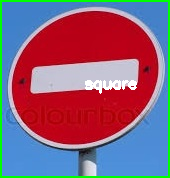

In [ ]:
#Load images and folder

myfolder_path="/content/drive/MyDrive/Task 2 - Dataset"


for f in glob.glob(os.path.join(myfolder_path, "*.jpg")):
        img = cv2.imread(f)
        # print(img.shape)
        resized = imutils.resize(img, width=300)
        ratio = img.shape[0] / float(resized.shape[0])
        # print(ratio)
        # print(img.shape)
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        # cv2_imshow(img)
        # setting threshold of gray image
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
        # print(threshold)
        # find contours in the thresholded image and initialize the
        # shape detector
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        sd = ShapeDetector()

        # loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
	cv2.putText(img, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# show the output image
	cv2_imshow(img)
	cv2.waitKey(0)


 



On Line 15, we first import our image from disc and then resize it on Line 16. On Line 17, we maintain track of the ratio of the old height to the new resized height — we'll figure out why later in the course.

The scaled image is next converted to grayscale, smoothed to remove high frequency noise, and then thresholded to show the image's shapes in Lines 21-23.

Our image should look like this after thresholding:

Take note of how our image has been binarized, with the forms appearing as a white foreground on a black background.


Finally, we identify contours in our binary image, handle getting the correct tuple value from cv2.findContours based on our OpenCV version, and initialise our ShapeDetector (Lines 27-30).



The final stage is to recognise each contour:

We begin looping through each of the different contours on Line 33. We compute the contour's centre for each of them, then perform shape detection and tagging.

We must multiply the contours and centre (x, y)-coordinates by our resize ratio because we are processing the contours taken from the resized image (rather than the original image) (Lines 43-45). This will provide us the right (x, y)-coordinates for the original image's contours and centroid.

Finally, we draw the contours and labelled shape on our image (Lines 44-48), then show our results (Lines 51 and 52).